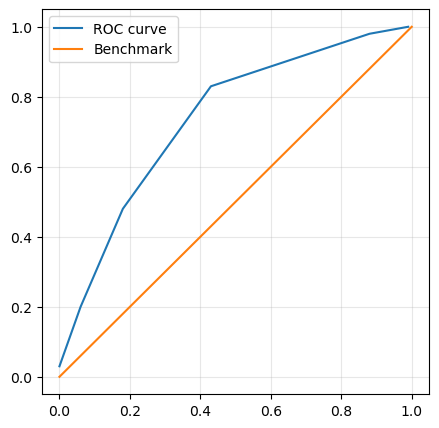

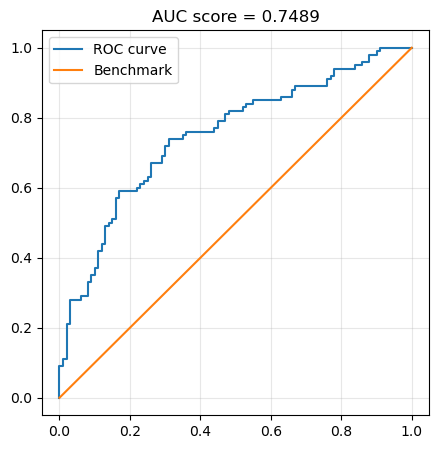

In [ ]:
# 利用分類器不同的閥值來畫出 ROC curve 並計算 AUC 面積

# 這類指標只能用再連續型數字的資料，才能有機率分配來算 ( 例如 Logistic Regression )

# 因此這裡用自己產生的分配來實作，而不用 K-means 當作案例


from sklearn.metrics import confusion_matrix , roc_curve , roc_auc_score
import matplotlib.pyplot as plt
import numpy


# 1. 產生陽性組和陰性組各自的測量值 ( 也就是 x )

P_group_measure = numpy.random.normal(loc=1,scale=0.5,size=100)
N_group_measure = numpy.random.normal(loc=1.5,scale=0.5,size=100)

group_measure = numpy.hstack((P_group_measure,N_group_measure))


# 2. 產生陽性組和陰性組的真正值 ( 也就是 y_true )

P_group_true = numpy.array([0]*100)
N_group_true = numpy.array([1]*100)

group_true = numpy.hstack((P_group_true,N_group_true))


# 3-1. ( 方法一 ) 再設定不同閥值，並作為分類依據產生 y_prediction 以及 TPR , FPR 和 roc , auc

threhold = [0.2,0.6,1.0,1.4,2.0,2.4]

tpr = []

fpr = []

for i in threhold : 

    group_prediction = []

    for value in group_measure : 

        if value <= i : 

            group_prediction.append(0)

        else : 

            group_prediction.append(1)

    matrix = confusion_matrix(group_true,group_prediction)

    tpr_value = matrix[0,0] / ( matrix[0,0] + matrix[0,1] )

    tpr.append(tpr_value)

    fpr_value = matrix[1,0] / ( matrix[1,0] + matrix[1,1] )

    fpr.append(fpr_value)

plt.figure(figsize=(5,5))

# 要記得 fpr 是 x 軸，tpr 是 y 軸

plt.plot(fpr,tpr,label="ROC curve")
plt.plot([0,1],[0,1],label="Benchmark")

plt.grid(alpha=0.3)
plt.legend()

plt.show()


# 3-2. 或者直接用 roc_curve() 來找 tpr , fpr 和閥值 , 然後算 auc

# roc_curve() 會自動測試閥值，因此要用測量值 x 來做，產生不同的 y_prediction 和相對應的 tpr , fpr 結果

# 注意第一個變數是 fpr，第二個才是 tpr 
    
fpr , tpr , threhold_set = roc_curve(group_true,group_measure)

# auc 也是一樣，用測量值 x ( auc 介於 0.5 和 1 之間，越接近 1 越好 )

auc_score = roc_auc_score(group_true,group_measure)

plt.figure(figsize=(5,5))

plt.plot(fpr,tpr,label="ROC curve")
plt.plot([0,1],[0,1],label="Benchmark")

plt.title(f"AUC score = {auc_score}")

plt.grid(alpha=0.3)
plt.legend()

plt.show()
